# <span style="color:#16697a"> <center> DSIM, Assignment 1 - AA 2020/2021 </center>

> <span style="color:#ffa62b">**Studente**:</span> Campironi Matteo
>
> <span style="color:#ffa62b">**Matricola**:</span> 801850

<span style="color:#ffa62b">**Zero-Crossing Rate**:</span>
count how many times the signal goes from positive to negative, and from negative to positive.

Possible approach:

1. Shift the signal by one unit
2. Compare point-by-point the sign (``np.sign()``) of the original signal and of the shifted signal
3. Accumulate the instances of sign change

In [1]:
import numpy as np
from scipy.io import wavfile as wav
from matplotlib import pyplot as plt

#librosa usata solo per controllare la correttezza dell'output
import librosa 
import librosa.display as lid

# <span style="color:#16697a"> 1. Toy example

Proviamo a creare un esempio giocattolo per capire come calcolare lo ZCR:

In [2]:
wave = np.array([1, 6, 4, -1, -2, -1, 1, 5, -4, -5, -2, -1, 1, 2, 1, 4])

Rappresentiamo l'onda graficamente:

<div style="width:image width px; 
            font-size:80%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:31em;  ">
    <img src="https://i.imgur.com/bi5me9v.jpg" 
         width=600 
         style="padding-left:250px;"/>
    </div>
</div>

Possiamo osservare come in questo caso il segnale passi da positivo a negativo e viceversa 4 volte. Questo è il risultato che ci aspettiamo di ottenere con la nostra funzione ZCR.

Consideriamo ora la stessa onda traslata di un'unità:

<div style="width:image width px; 
            font-size:80%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:31em;  ">
    <img src="https://i.imgur.com/m4qopFx.jpg" 
         width=600 
         style="padding-left:250px;"/>
    </div>
</div>

Calcoliamo la funzione segno utilizzando `np.sign()` offerta da numpy:

In [3]:
np.sign(wave)

array([ 1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1])

<div style="width:image width px; 
            font-size:80%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:31em;  ">
    <img src="https://i.imgur.com/M7BEBFD.jpg" 
         width=600 
         style="padding-left:250px;"/>
    </div>
</div>

Utilizziamo la funzione `np.diff()` che ci permette di calcolare le differenze tra un elemento di un array e il suo precedente. Quello che si ottiene è un array di lunghezza length(wave)-1:

In [4]:
np.diff(np.sign(wave))

array([ 0,  0, -2,  0,  0,  2,  0, -2,  0,  0,  0,  2,  0,  0,  0])

In figura è mostrato il grafico della funzione $\text{sign}(\text{wave}[i])-\text{sign}(\text{wave}[i-1])$. Come è possibile osservare vengono assunti valori diversi da $0$ esattamente nei punti in cui vi è un cambio di segno. Quindi per calcolare lo ZCR basterà contare il numero di volte in cui il vettore delle differenze presenta elementi non nulli.

<div style="width:image width px; 
            font-size:80%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:31em;  ">
    <img src="https://i.imgur.com/jCnCKMu.jpg" 
         width=600 
         style="padding-left:250px;"/>
    </div>
</div>

In [5]:
sum((np.diff(np.sign(wave)) != 0))

4

Proviamo ora ad utilizzare la funzione incorporata nella libreria `librosa`

In [6]:
zero_crossings = librosa.zero_crossings(wave, pad=False)
print(sum(zero_crossings))

4


# <span style="color:#16697a"> 2. Real example

Proviamo ora con un esempio concreto. Verrà utilizzato uno dei file wav proposti nella seconda esercitazione:

In [7]:
sr, track = wav.read('recordings/0_jackson_1.wav')

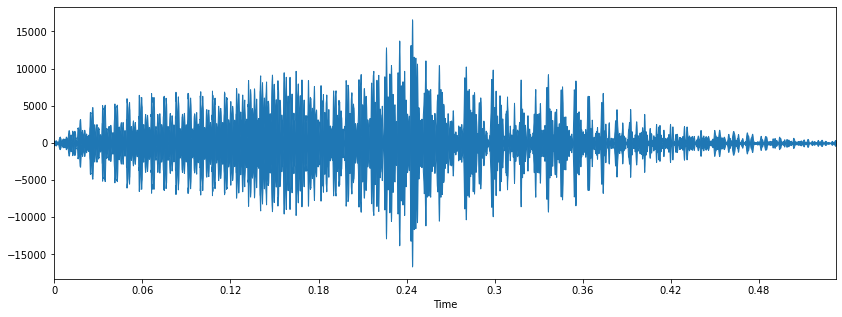

In [8]:
plt.figure(figsize=(14, 5))
lid.waveplot(track.astype(np.float32), sr=sr); plt.show()

Proviamo quindi a calcolare come prima lo Zero-Crossing Rate e verifichiamo che il risultato coincida con quello della libreria `librosa`:

In [9]:
sum((np.diff(np.sign(track)) != 0))

398

In [10]:
zero_crossings = librosa.zero_crossings(track, pad=False)
print(sum(zero_crossings))

395


Come possiamo osservare, in questo caso i due valori sono diversi. Andiamo a considerare una specifica finestra di valori che va da 117 a 122:

[  5  11   0 285  38]


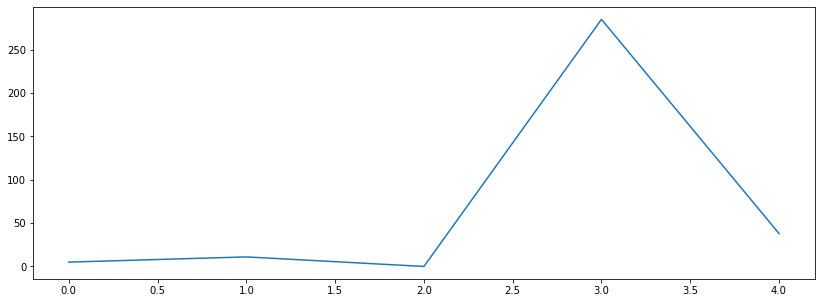

In [11]:
start = 117
end = 122

print(track[start:end])

plt.figure(figsize=(14, 5))
plt.plot(track[start:end]); plt.show()

Possiamo notare come sia presente un valore nullo del segnale. La funzione `np.sign()` restituisce 0 se l'argomento è nullo, il che porta a contare un cambio di segno anche quando la funzione non è mai stata negativa.

Per questo motivo utilizzerò la più semplice funzione `np.signbit()`, che resituisce `True` se i valori sono negativi e `False` se positivi o nulli:

In [12]:
sum(np.diff(np.signbit(track)))

395

In questo modo ritroviamo esattamente il valore ottenuto con la funzione `librosa.zero_crossings`

# <span style="color:#16697a"> 3. Definition of the ZCR function

Definiamo quindi la funzione ZCR, tenendo conto di quanto visto precedentemente e dando la possibilità di scelta all'utente:
- `zp = True`: lo zero viene contato come positivo, quindi viene utilizzata la seguente funzione segno

$$\text{sign}(x) = \begin{cases} 
      1 & x\geq 0 \\
      -1 & x<0 
   \end{cases}$$
   
- `zp = False`: lo zero non viene contato come positivo, quindi viene utilizzata la seguente funzione segno

$$\text{sign}(x) = \begin{cases} 
      1 & x> 0 \\
      0 & x= 0 \\
      -1 & x<0 
   \end{cases}$$

Come su `librosa.zero_crossings` di default `zp = True`

In [13]:
def zcr(input, zp=True):
    if zp:
        return [sum(np.diff(np.signbit(input)))]
    else:
        return [sum((np.diff(np.sign(input)) != 0))]

# <span style="color:#16697a"> 4. Effects on classification performance

In [14]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav

import matplotlib.pyplot as plt
import IPython.display as ipd

# Classification tools
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Advanced audio features
import librosa
import librosa.display as lid
from sklearn.preprocessing import scale

In [15]:
def identity(input):
    return input

def load_data(feature_extractor=identity, normalize=False):

    labels = []
    features = []

    for f in sorted(os.listdir('./recordings')):
        if f.endswith('.wav'):
            # Load file and compute the requested features
            _, signal = wav.read('./recordings/' + f)
            cur_features = feature_extractor(signal)
            features.append(cur_features)

            # Classes
            label = f.split('_')[0]
            labels.append(label)

    # X: features, y: labels
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=1)

    if normalize:
        eps = 0.001
        X_train = np.array(X_train)
        X_train_mean = X_train.mean(axis=0)
        X_train_std = X_train.std(axis=0)
        X_train = (X_train - X_train_mean + eps)/(X_train_std + eps)
        X_train = [row for row in X_train]

        X_test = [row for row in (np.array(X_test) - X_train_mean + eps)/(X_train_std + eps)]

    return X_train, X_test, y_train, y_test

In [16]:
def crop(input, size=100):
    # Remove any values exceeding the given limit
    output = input[0:min(size, input.shape[0])]
    # Add null values (padding) in order to reach the requested size
    output = np.concatenate((output, np.zeros(size-output.shape[0])))
    return output

In [17]:
def sdev(input):
    return np.std(input, keepdims=True)

In [18]:
def avg(input):
    return np.mean(input, keepdims=True)

def aavg(input):
    return np.mean(np.abs(input), keepdims=True)

In [19]:
def duration(input):
    return input.shape

def energy(input):
    return np.sum((input*1.0)**2, keepdims=True)

In [20]:
def mfcc(input, rate=8000, min_len=40, sampling=1):
    # Sample values
    signal = input[::sampling]
    # Compute MFCC coefficients
    mfcc = librosa.feature.mfcc(signal*1.0, sr=int(rate/sampling))
    # Add additional necessary zeroes to reach the required length
    pad_width = min_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    # Flatten into monodimensional vector for the SVM
    mfcc = mfcc.flatten()
    return mfcc

In [21]:
def combo(input):
    return np.concatenate((aavg(input),sdev(input),duration(input),energy(input)))

In [22]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=combo, normalize=True)

In [23]:
# Parameters to be tested in cross-validation
param_grid = {'C': [1e2, 5e2, 1e3],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('C: {}'.format(clf.best_params_['C']))
print('Gamma: {}'.format(clf.best_params_['gamma']))
print('Training completed in %0.3fs' % (time() - t0))

C: 1000.0
Gamma: 0.5
Training completed in 2.989s


Classification report:
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        17
           1       0.33      0.40      0.36        10
           2       0.28      0.33      0.30        15
           3       0.53      0.42      0.47        19
           4       0.36      0.45      0.40        11
           5       0.44      0.29      0.35        14
           6       0.79      0.79      0.79        14
           7       0.80      0.42      0.55        19
           8       0.35      0.41      0.38        17
           9       0.32      0.43      0.36        14

    accuracy                           0.46       150
   macro avg       0.48      0.46      0.46       150
weighted avg       0.49      0.46      0.47       150

Confusion matrix:
[[11  0  0  0  0  0  0  0  0  6]
 [ 0  4  2  2  0  1  0  0  1  0]
 [ 2  1  5  3  0  0  0  0  2  2]
 [ 0  3  7  8  0  0  0  0  0  1]
 [ 1  1  1  1  5  2  0  0  0  0]
 [ 1  0  0  1  4  4  1  0  2  1]
 [

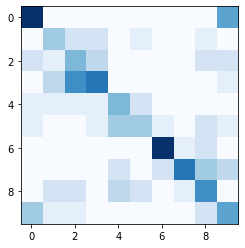

In [24]:
# Test
y_pred = clf.predict(X_test)

# Classificaiton report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues); plt.show()

In [25]:
def comboZCR(input):
    return np.concatenate((aavg(input),sdev(input),duration(input),energy(input),zcr(input)))

In [26]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=comboZCR, normalize=True)

In [27]:
# Parameters to be tested in cross-validation
param_grid = {'C': [1e2, 5e2, 1e3],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('C: {}'.format(clf.best_params_['C']))
print('Gamma: {}'.format(clf.best_params_['gamma']))
print('Training completed in %0.3fs' % (time() - t0))

C: 500.0
Gamma: 0.1
Training completed in 2.027s


Classification report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.53      0.90      0.67        10
           2       0.64      0.60      0.62        15
           3       0.75      0.63      0.69        19
           4       0.47      0.64      0.54        11
           5       0.53      0.64      0.58        14
           6       0.87      0.93      0.90        14
           7       0.89      0.42      0.57        19
           8       0.56      0.59      0.57        17
           9       0.82      0.64      0.72        14

    accuracy                           0.67       150
   macro avg       0.68      0.68      0.67       150
weighted avg       0.70      0.67      0.67       150

Confusion matrix:
[[14  0  1  0  0  0  0  0  0  2]
 [ 0  9  0  0  1  0  0  0  0  0]
 [ 0  0  9  2  0  1  1  0  2  0]
 [ 1  1  1 12  1  2  1  0  0  0]
 [ 0  2  1  1  7  0  0  0  0  0]
 [ 0  1  1  0  1  9  0  1  1  0]
 [

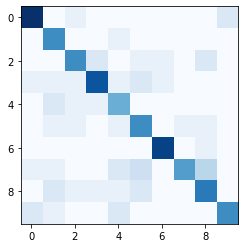

In [28]:
# Test
y_pred = clf.predict(X_test)

# Classificaiton report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues); plt.show()

È possibile osservare come la combinazione ottimale degli iper-parametri sia variata, sia per `C` che per quanto riguarda `gamma`. Il classification report indica un miglioramento delle prestazioni del modello sul test set dovuto all'utilizzo dello Zero-Crossing Rate come feature, guadagnando circa il 21% in accuracy ed in weighted avg f1-score.